## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

# 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

In [1]:
import os
from tensorflow.python import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.python.keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
BATCH_SIZEs = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""
Write your training loop and record results
"""
for BATCH_SIZE in BATCH_SIZEs:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(
        lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(
        loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

    model.fit(
        x_train,
        y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(x_test, y_test),
        shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "Batch size-%s" % str(BATCH_SIZE)
    results[exp_name_tag] = {
        'train-loss': train_loss,
        'valid-loss': valid_loss,
        'train-acc': train_acc,
        'valid-acc': valid_acc
    }

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v1 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 128)               512   

50000/50000 [==============================] - 228s 5ms/sample - loss: 2.2952 - acc: 0.1178 - val_loss: 15.3498 - val_acc: 0.1358
Epoch 49/50
50000/50000 [==============================] - 229s 5ms/sample - loss: 2.2892 - acc: 0.1233 - val_loss: 3.5025 - val_acc: 0.1437
Epoch 50/50
50000/50000 [==============================] - 228s 5ms/sample - loss: 2.2951 - acc: 0.1188 - val_loss: 6.0123 - val_acc: 0.0981
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)   

50000/50000 [==============================] - 29s 580us/sample - loss: 1.1228 - acc: 0.6022 - val_loss: 1.3600 - val_acc: 0.5263
Epoch 46/50
50000/50000 [==============================] - 29s 576us/sample - loss: 1.1158 - acc: 0.6058 - val_loss: 1.4075 - val_acc: 0.5212
Epoch 47/50
50000/50000 [==============================] - 29s 578us/sample - loss: 1.1145 - acc: 0.6050 - val_loss: 1.4271 - val_acc: 0.5134
Epoch 48/50
50000/50000 [==============================] - 29s 582us/sample - loss: 1.1024 - acc: 0.6089 - val_loss: 1.3671 - val_acc: 0.5344
Epoch 49/50
50000/50000 [==============================] - 29s 579us/sample - loss: 1.1013 - acc: 0.6081 - val_loss: 1.3915 - val_acc: 0.5253
Epoch 50/50
50000/50000 [==============================] - 29s 576us/sample - loss: 1.1018 - acc: 0.6087 - val_loss: 1.4164 - val_acc: 0.5175
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (In

50000/50000 [==============================] - 15s 306us/sample - loss: 0.8494 - acc: 0.6976 - val_loss: 1.5045 - val_acc: 0.5258
Epoch 43/50
50000/50000 [==============================] - 15s 301us/sample - loss: 0.8307 - acc: 0.7041 - val_loss: 1.5641 - val_acc: 0.5113
Epoch 44/50
50000/50000 [==============================] - 15s 304us/sample - loss: 0.8234 - acc: 0.7071 - val_loss: 1.5826 - val_acc: 0.5092
Epoch 45/50
50000/50000 [==============================] - 15s 305us/sample - loss: 0.8122 - acc: 0.7112 - val_loss: 1.6286 - val_acc: 0.4957
Epoch 46/50
50000/50000 [==============================] - 15s 304us/sample - loss: 0.8085 - acc: 0.7109 - val_loss: 1.6693 - val_acc: 0.4955
Epoch 47/50
50000/50000 [==============================] - 15s 302us/sample - loss: 0.8009 - acc: 0.7143 - val_loss: 1.6030 - val_acc: 0.5162
Epoch 48/50
50000/50000 [==============================] - 15s 304us/sample - loss: 0.7940 - acc: 0.7161 - val_loss: 1.6372 - val_acc: 0.5095
Epoch 49/50
50000/

50000/50000 [==============================] - 5s 92us/sample - loss: 0.4037 - acc: 0.8585 - val_loss: 2.1208 - val_acc: 0.4744
Epoch 41/50
50000/50000 [==============================] - 5s 91us/sample - loss: 0.3830 - acc: 0.8653 - val_loss: 2.2467 - val_acc: 0.4697
Epoch 42/50
50000/50000 [==============================] - 5s 91us/sample - loss: 0.3585 - acc: 0.8766 - val_loss: 2.5293 - val_acc: 0.4484
Epoch 43/50
50000/50000 [==============================] - 5s 92us/sample - loss: 0.3614 - acc: 0.8743 - val_loss: 2.3465 - val_acc: 0.4751
Epoch 44/50
50000/50000 [==============================] - 5s 90us/sample - loss: 0.3584 - acc: 0.8742 - val_loss: 2.2711 - val_acc: 0.4779
Epoch 45/50
50000/50000 [==============================] - 5s 92us/sample - loss: 0.3439 - acc: 0.8826 - val_loss: 2.2900 - val_acc: 0.4637
Epoch 46/50
50000/50000 [==============================] - 5s 92us/sample - loss: 0.3337 - acc: 0.8840 - val_loss: 2.3897 - val_acc: 0.4598
Epoch 47/50
50000/50000 [=======

50000/50000 [==============================] - 3s 55us/sample - loss: 0.3258 - acc: 0.8998 - val_loss: 2.1873 - val_acc: 0.4653
Epoch 39/50
50000/50000 [==============================] - 3s 58us/sample - loss: 0.3123 - acc: 0.9036 - val_loss: 2.1752 - val_acc: 0.4500
Epoch 40/50
50000/50000 [==============================] - 3s 55us/sample - loss: 0.2998 - acc: 0.9074 - val_loss: 2.1285 - val_acc: 0.4669
Epoch 41/50
50000/50000 [==============================] - 3s 55us/sample - loss: 0.2732 - acc: 0.9197 - val_loss: 2.3467 - val_acc: 0.4625
Epoch 42/50
50000/50000 [==============================] - 3s 56us/sample - loss: 0.2634 - acc: 0.9230 - val_loss: 2.2715 - val_acc: 0.4629
Epoch 43/50
50000/50000 [==============================] - 3s 56us/sample - loss: 0.2570 - acc: 0.9237 - val_loss: 2.2215 - val_acc: 0.4758
Epoch 44/50
50000/50000 [==============================] - 3s 56us/sample - loss: 0.2402 - acc: 0.9287 - val_loss: 2.2752 - val_acc: 0.4646
Epoch 45/50
50000/50000 [=======

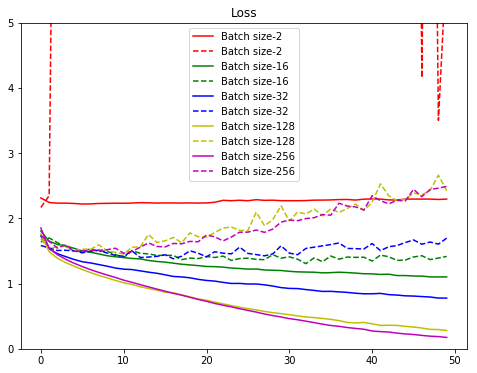

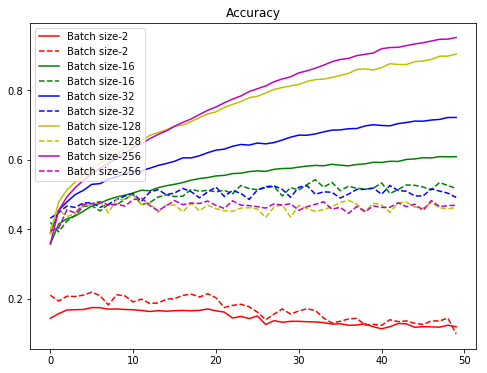

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(
    lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(
    loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

model.fit(
    x_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, y_test),
    shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v1_15 (B (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_v1_16 (B (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0   

50000/50000 [==============================] - 3s 55us/sample - loss: 0.0465 - acc: 0.9946 - val_loss: 2.6244 - val_acc: 0.4806
Epoch 47/50
50000/50000 [==============================] - 3s 55us/sample - loss: 0.0429 - acc: 0.9956 - val_loss: 2.6463 - val_acc: 0.4792
Epoch 48/50
50000/50000 [==============================] - 3s 55us/sample - loss: 0.0374 - acc: 0.9971 - val_loss: 2.6637 - val_acc: 0.4793
Epoch 49/50
50000/50000 [==============================] - 3s 55us/sample - loss: 0.0359 - acc: 0.9967 - val_loss: 2.7067 - val_acc: 0.4796
Epoch 50/50
50000/50000 [==============================] - 3s 54us/sample - loss: 0.0345 - acc: 0.9970 - val_loss: 2.5912 - val_acc: 0.4919


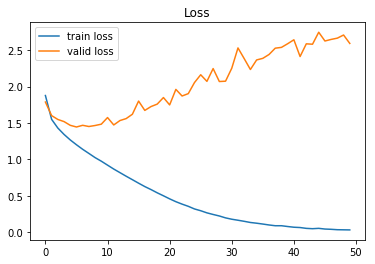

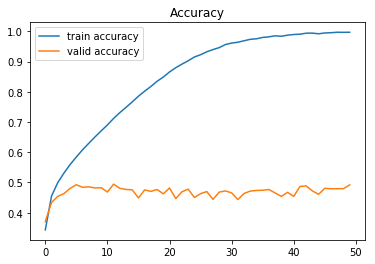

In [11]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# 請於 BN 放在 Input Layer 後，並比較結果

In [12]:
from tensorflow.python.keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)

        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
LEARNING_RATE = 1e-3
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [14]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(
    lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(
    loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

model.fit(
    x_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, y_test),
    shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_v1_18 (B (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,740,938
Trainable params: 1,739,914
Non-trainable params: 1,024
_____________________________________________

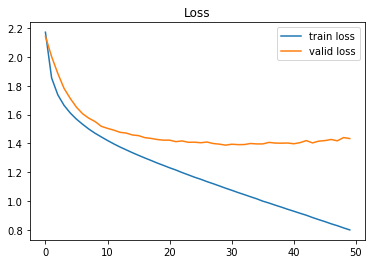

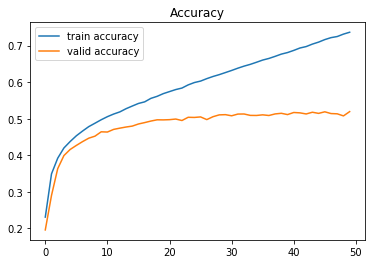

In [15]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()